**We have 4 datasets:**

**- Customer Demographic**

**- Customer Addresses**

**- Transactions data in the past 3 months**

**- New Customers ( We won't use it for the analysis)**

# Task 1: Data Quality

 **Transactions Dataset**

In [1]:
import pandas as pd

In [2]:
Transactions = pd.read_excel("KPMG_raw.xlsx", sheet_name='Transactions',header=1)
Transactions.head()

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date
0,1,2,2950,2017-02-25,0.0,Approved,Solex,Standard,medium,medium,71.49,53.62,41245.0
1,2,3,3120,2017-05-21,1.0,Approved,Trek Bicycles,Standard,medium,large,2091.47,388.92,41701.0
2,3,37,402,2017-10-16,0.0,Approved,OHM Cycles,Standard,low,medium,1793.43,248.82,36361.0
3,4,88,3135,2017-08-31,0.0,Approved,Norco Bicycles,Standard,medium,medium,1198.46,381.10,36145.0
4,5,78,787,2017-10-01,1.0,Approved,Giant Bicycles,Standard,medium,large,1765.30,709.48,42226.0


In [3]:
Transactions.shape

(20000, 13)

In [4]:
Transactions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   transaction_id           20000 non-null  int64         
 1   product_id               20000 non-null  int64         
 2   customer_id              20000 non-null  int64         
 3   transaction_date         20000 non-null  datetime64[ns]
 4   online_order             19640 non-null  float64       
 5   order_status             20000 non-null  object        
 6   brand                    19803 non-null  object        
 7   product_line             19803 non-null  object        
 8   product_class            19803 non-null  object        
 9   product_size             19803 non-null  object        
 10  list_price               20000 non-null  float64       
 11  standard_cost            19803 non-null  float64       
 12  product_first_sold_date  19803 n

- There are some missing values in the columns : 'online_order', 'brand', 'product_line ', 'product_class', 'product_size', 'standard_cost', 'product_first_sold_date'

- The 'product_first_sold_date' column is of float datatype which has to be changed to date format


In [5]:
Transactions['product_first_sold_date'] = pd.to_datetime(Transactions['product_first_sold_date'], unit='s')

In [6]:
Transactions.isnull().sum()

transaction_id               0
product_id                   0
customer_id                  0
transaction_date             0
online_order               360
order_status                 0
brand                      197
product_line               197
product_class              197
product_size               197
list_price                   0
standard_cost              197
product_first_sold_date    197
dtype: int64

In [7]:
Transactions.duplicated().sum()

0

- There are many missing values in the data and there are no duplicates

In [8]:
Transactions.nunique()

transaction_id             20000
product_id                   101
customer_id                 3494
transaction_date             364
online_order                   2
order_status                   2
brand                          6
product_line                   4
product_class                  3
product_size                   3
list_price                   296
standard_cost                103
product_first_sold_date      100
dtype: int64

In [9]:
Transactions['order_status'].value_counts()

Approved     19821
Cancelled      179
Name: order_status, dtype: int64

In [10]:
Transactions['online_order'].value_counts()

1.0    9829
0.0    9811
Name: online_order, dtype: int64

In [11]:
Transactions['product_line'].value_counts()

Standard    14176
Road         3970
Touring      1234
Mountain      423
Name: product_line, dtype: int64

In [12]:
Transactions['product_size'].value_counts()

medium    12990
large      3976
small      2837
Name: product_size, dtype: int64

In [13]:
Transactions['product_class'].value_counts()

medium    13826
high       3013
low        2964
Name: product_class, dtype: int64

In [14]:
Transactions['brand'].value_counts()

Solex             4253
Giant Bicycles    3312
WeareA2B          3295
OHM Cycles        3043
Trek Bicycles     2990
Norco Bicycles    2910
Name: brand, dtype: int64

In [15]:
# Removing nulls

Transactions = Transactions.dropna(subset=['standard_cost'])

In [16]:
Transactions['standard_cost'].isna().sum()

0

In [17]:
Transactions['standard_cost'] = Transactions['standard_cost'].astype(int)

In [18]:
Transactions['list_price'] = Transactions['list_price'].astype(int)

In [19]:
# Creating Profit column

Transactions['Profit'] = Transactions['list_price'] - Transactions['standard_cost']

In [20]:
Transactions['Profit'].isna().sum()

0

In [21]:
# Removing nulls

Transactions = Transactions.dropna(subset=['product_first_sold_date'])

In [22]:
Transactions.isna().sum()

transaction_id               0
product_id                   0
customer_id                  0
transaction_date             0
online_order               358
order_status                 0
brand                        0
product_line                 0
product_class                0
product_size                 0
list_price                   0
standard_cost                0
product_first_sold_date      0
Profit                       0
dtype: int64

In [23]:
Transactions.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19803 entries, 0 to 19999
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   transaction_id           19803 non-null  int64         
 1   product_id               19803 non-null  int64         
 2   customer_id              19803 non-null  int64         
 3   transaction_date         19803 non-null  datetime64[ns]
 4   online_order             19445 non-null  float64       
 5   order_status             19803 non-null  object        
 6   brand                    19803 non-null  object        
 7   product_line             19803 non-null  object        
 8   product_class            19803 non-null  object        
 9   product_size             19803 non-null  object        
 10  list_price               19803 non-null  int32         
 11  standard_cost            19803 non-null  int32         
 12  product_first_sold_date  19803 n

**Customer Demographic Dataset**

In [24]:
Customer_Demographic = pd.read_excel("KPMG_raw.xlsx", sheet_name='CustomerDemographic',header=1)
Customer_Demographic.head()

C:\Users\Lazaros\AppData\Local\Temp\ipykernel_4880\3311052493.py:1: FutureWarning: Inferring datetime64[ns] from data containing strings is deprecated and will be removed in a future version. To retain the old behavior explicitly pass Series(data, dtype=datetime64[ns])
  Customer_Demographic = pd.read_excel("KPMG_raw.xlsx", sheet_name='CustomerDemographic',header=1)


,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,default,owns_car,tenure
0,1,Laraine,Medendorp,F,93,1953-10-12,Executive Secretary,Health,Mass Customer,N,"""'",Yes,11.0
1,2,Eli,Bockman,Male,81,1980-12-16,Administrative Officer,Financial Services,Mass Customer,N,<script>alert('hi')</script>,Yes,16.0
2,3,Arlin,Dearle,Male,61,1954-01-20,Recruiting Manager,Property,Mass Customer,N,2018-02-01 00:00:00,Yes,15.0
3,4,Talbot,NaN,Male,33,1961-10-03,NaN,IT,Mass Customer,N,() { _; } >_[$($())] { touch /tmp/blns.shellsh...,No,7.0
4,5,Sheila-kathryn,Calton,Female,56,1977-05-13,Senior Editor,NaN,Affluent Customer,N,NIL,Yes,8.0


In [25]:
Customer_Demographic.shape

(4000, 13)

In [26]:
Customer_Demographic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 13 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   customer_id                          4000 non-null   int64         
 1   first_name                           4000 non-null   object        
 2   last_name                            3875 non-null   object        
 3   gender                               4000 non-null   object        
 4   past_3_years_bike_related_purchases  4000 non-null   int64         
 5   DOB                                  3913 non-null   datetime64[ns]
 6   job_title                            3494 non-null   object        
 7   job_industry_category                3344 non-null   object        
 8   wealth_segment                       4000 non-null   object        
 9   deceased_indicator                   4000 non-null   object        
 10  default     

In [27]:
Customer_Demographic.isnull().sum()

customer_id                              0
first_name                               0
last_name                              125
gender                                   0
past_3_years_bike_related_purchases      0
DOB                                     87
job_title                              506
job_industry_category                  656
wealth_segment                           0
deceased_indicator                       0
default                                302
owns_car                                 0
tenure                                  87
dtype: int64

In [28]:
Customer_Demographic.duplicated().sum()

0

- The table has some missing values in certain columns : 'last_name', 'DOB', 'job_title', 'job_industry_category', 'default', 'tenure'

- There are no duplicate values

- The 'gender' column has inconsistent entires in it

- The 'default' column seems to be unusual

In [29]:
Customer_Demographic['default'].value_counts()

100                                       113
1                                         112
-1                                        111
-100                                       99
Ù¡Ù¢Ù£                                     53
                                         ... 
testâ testâ«                               31
/dev/null; touch /tmp/blns.fail ; echo     30
âªâªtestâª                                 29
ì¸ëë°í ë¥´                                 27
,ãã»:*:ã»ãâ( â» Ï â» )ãã»:*:ã»ãâ           25
Name: default, Length: 90, dtype: int64

In [30]:
#Deleting 'Default' column

Customer_Demographic = Customer_Demographic.drop("default", axis=1)

In [31]:
Customer_Demographic['gender'].value_counts()

Female    2037
Male      1872
U           88
F            1
Femal        1
M            1
Name: gender, dtype: int64

- The 'default' column seems to have some random text entries in it. And it seems to serve no purpose so it can be dropped from the table

- The 'gender' column has entries for male and female specifies by 4 values : 'Male', 'Female', 'M', 'F' and it also has an entry 'U' which means 'Unidentified'

In [33]:
Customer_Demographic['gender'] = Customer_Demographic['gender'].replace('Female','F').replace('Male','M').replace('Femal','F').replace('Unidentified','U')

In [34]:
Customer_Demographic.nunique()

customer_id                            4000
first_name                             3139
last_name                              3725
gender                                    3
past_3_years_bike_related_purchases     100
DOB                                    3448
job_title                               195
job_industry_category                     9
wealth_segment                            3
deceased_indicator                        2
owns_car                                  2
tenure                                   22
dtype: int64

In [35]:
Customer_Demographic['gender'].value_counts()

F    2039
M    1873
U      88
Name: gender, dtype: int64

In [36]:
Customer_Demographic['wealth_segment'].value_counts()

Mass Customer        2000
High Net Worth       1021
Affluent Customer     979
Name: wealth_segment, dtype: int64

In [37]:
Customer_Demographic['job_industry_category'].value_counts()

Manufacturing         799
Financial Services    774
Health                602
Retail                358
Property              267
IT                    223
Entertainment         136
Argiculture           113
Telecommunications     72
Name: job_industry_category, dtype: int64

In [38]:
Customer_Demographic['deceased_indicator'].value_counts()

N    3998
Y       2
Name: deceased_indicator, dtype: int64

In [39]:
Customer_Demographic['owns_car'].value_counts()

Yes    2024
No     1976
Name: owns_car, dtype: int64

In [40]:
Customer_Demographic['DOB'].sort_values(ascending=True)

33     1843-12-21
719    1931-10-23
1091   1935-08-22
3409   1940-09-22
2412   1943-08-11
          ...    
3778          NaT
3882          NaT
3930          NaT
3934          NaT
3997          NaT
Name: DOB, Length: 4000, dtype: datetime64[ns]

In [41]:
#The date of birth on 1843 must be deleted

Customer_Demographic = Customer_Demographic.drop(index=Customer_Demographic[Customer_Demographic['DOB'] == '1843-12-21'].index)

In [42]:
Customer_Demographic['DOB'].isna().sum()

87

In [43]:
Customer_Demographic['tenure'].isna().sum()

87

In [44]:
Customer_Demographic['owns_car'].isna().sum()

0

In [45]:
Customer_Demographic['past_3_years_bike_related_purchases'].isna().sum()

0

In [46]:
Customer_Demographic['job_title'].isna().sum()

506

In [47]:
Customer_Demographic['job_industry_category'].isna().sum()

656

In [48]:
Customer_Demographic['wealth_segment'].isna().sum()

0

In [49]:
# Deleting nulls from 'DOB' & 'job_industry_category' columns

Customer_Demographic = Customer_Demographic.dropna(subset=['DOB', 'job_industry_category'])

In [50]:
Customer_Demographic.isna().sum()

customer_id                              0
first_name                               0
last_name                               96
gender                                   0
past_3_years_bike_related_purchases      0
DOB                                      0
job_title                              392
job_industry_category                    0
wealth_segment                           0
deceased_indicator                       0
owns_car                                 0
tenure                                   0
dtype: int64

In [51]:
print("We still have some null values, but they won't affect our analysis")

We still have some null values, but they won't affect our analysis


**Customer Address Dataset**

In [52]:
Address = pd.read_excel("KPMG_raw.xlsx", sheet_name='CustomerAddress',header=1)
Address.head()

,customer_id,address,postcode,state,country,property_valuation
0,1,060 Morning Avenue,2016,New South Wales,Australia,10
1,2,6 Meadow Vale Court,2153,New South Wales,Australia,10
2,4,0 Holy Cross Court,4211,QLD,Australia,9
3,5,17979 Del Mar Point,2448,New South Wales,Australia,4
4,6,9 Oakridge Court,3216,VIC,Australia,9


In [53]:
Address.shape

(3999, 6)

In [54]:
Address.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3999 entries, 0 to 3998
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   customer_id         3999 non-null   int64 
 1   address             3999 non-null   object
 2   postcode            3999 non-null   int64 
 3   state               3999 non-null   object
 4   country             3999 non-null   object
 5   property_valuation  3999 non-null   int64 
dtypes: int64(3), object(3)
memory usage: 187.6+ KB


In [55]:
Address.duplicated().sum()

0

In Customer Address dataset there are no empty or duplicated values

In [56]:
Address['state'].value_counts()

NSW                2054
VIC                 939
QLD                 838
New South Wales      86
Victoria             82
Name: state, dtype: int64

In [57]:
#Replacing the 'state' names so all the entries have the same type of name

Address['state'] = Address['state'].replace('NSW', 'New South Wales').replace('VIC', 'Victoria').replace('QLD', 'Queensland')

In [58]:
Address['state'].value_counts()

New South Wales    2140
Victoria           1021
Queensland          838
Name: state, dtype: int64

In [59]:
Address['country'].value_counts()

Australia    3999
Name: country, dtype: int64

In [60]:
Address['property_valuation'].value_counts()

9     647
8     646
10    577
7     493
11    281
6     238
5     225
4     214
12    195
3     186
1     154
2     143
Name: property_valuation, dtype: int64

# Task 2: Data Insights (Exploratory Data Analysis)

**We must have all the data in one dataset, so we will merge them**

In [61]:
# Merging Transactions & Customer_Demographic datasets

merged_tr_cd = pd.merge(Transactions, Customer_Demographic, on='customer_id', how='left')

In [62]:
merged_tr_cd.head(5)

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,...,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure
0,1,2,2950,2017-02-25,0.0,Approved,Solex,Standard,medium,medium,...,Anthony,M,19.0,1955-01-11,Software Engineer I,Financial Services,Mass Customer,N,Yes,10.0
1,2,3,3120,2017-05-21,1.0,Approved,Trek Bicycles,Standard,medium,large,...,O'Donnell,F,89.0,1979-02-04,Clinical Specialist,Health,Mass Customer,N,Yes,10.0
2,3,37,402,2017-10-16,0.0,Approved,OHM Cycles,Standard,low,medium,...,Donegan,M,9.0,1977-06-03,Desktop Support Technician,Retail,Affluent Customer,N,No,22.0
3,4,88,3135,2017-08-31,0.0,Approved,Norco Bicycles,Standard,medium,medium,...,Worsall,M,83.0,1962-01-14,Staff Scientist,Financial Services,Mass Customer,N,No,16.0
4,5,78,787,2017-10-01,1.0,Approved,Giant Bicycles,Standard,medium,large,...,Batrim,F,29.0,1996-12-15,NaN,Retail,Affluent Customer,N,Yes,2.0


In [63]:
merged_tr_cd.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19803 entries, 0 to 19802
Data columns (total 25 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   transaction_id                       19803 non-null  int64         
 1   product_id                           19803 non-null  int64         
 2   customer_id                          19803 non-null  int64         
 3   transaction_date                     19803 non-null  datetime64[ns]
 4   online_order                         19445 non-null  float64       
 5   order_status                         19803 non-null  object        
 6   brand                                19803 non-null  object        
 7   product_line                         19803 non-null  object        
 8   product_class                        19803 non-null  object        
 9   product_size                         19803 non-null  object        
 10  list_price

In [64]:
merged_tr_cd.shape

(19803, 25)

In [65]:
# Merging 'merged_tr_cd' & Address

merged = pd.merge(merged_tr_cd, Address, on='customer_id', how='left')

In [66]:
merged.head(5)

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,...,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure,address,postcode,state,country,property_valuation
0,1,2,2950,2017-02-25,0.0,Approved,Solex,Standard,medium,medium,...,Financial Services,Mass Customer,N,Yes,10.0,984 Hoepker Court,3064.0,Victoria,Australia,6.0
1,2,3,3120,2017-05-21,1.0,Approved,Trek Bicycles,Standard,medium,large,...,Health,Mass Customer,N,Yes,10.0,4 Shopko Circle,2196.0,New South Wales,Australia,5.0
2,3,37,402,2017-10-16,0.0,Approved,OHM Cycles,Standard,low,medium,...,Retail,Affluent Customer,N,No,22.0,586 Miller Parkway,2835.0,New South Wales,Australia,1.0
3,4,88,3135,2017-08-31,0.0,Approved,Norco Bicycles,Standard,medium,medium,...,Financial Services,Mass Customer,N,No,16.0,1617 Harper Parkway,2096.0,New South Wales,Australia,10.0
4,5,78,787,2017-10-01,1.0,Approved,Giant Bicycles,Standard,medium,large,...,Retail,Affluent Customer,N,Yes,2.0,0601 Stephen Place,2292.0,New South Wales,Australia,7.0


In [185]:
merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19803 entries, 0 to 19802
Data columns (total 30 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   transaction_id                       19803 non-null  int64         
 1   product_id                           19803 non-null  int64         
 2   customer_id                          19803 non-null  int64         
 3   transaction_date                     19803 non-null  datetime64[ns]
 4   online_order                         19445 non-null  float64       
 5   order_status                         19803 non-null  object        
 6   brand                                19803 non-null  object        
 7   product_line                         19803 non-null  object        
 8   product_class                        19803 non-null  object        
 9   product_size                         19803 non-null  object        
 10  list_price

In [67]:
merged.shape

(19803, 30)

**Now we have all the data that we needed in one dataset**

In [68]:
merged['country'].value_counts()

Australia    19773
Name: country, dtype: int64

In [69]:
# Since all the customers are from Australia,'country' is not needed

merged = merged.drop("country", axis=1)

In [70]:
# Importing libraries for visualizations

import seaborn as sns
import matplotlib.pyplot as plt

In [71]:
merged.corr()

,transaction_id,product_id,customer_id,online_order,list_price,standard_cost,Profit,past_3_years_bike_related_purchases,tenure,postcode,property_valuation
transaction_id,1.000000,-0.009972,0.002939,0.001693,-0.007111,-0.003292,-0.005690,-0.000360,0.001216,0.003082,-0.003009
product_id,-0.009972,1.000000,0.002793,-0.005471,0.091124,0.038829,0.075677,-0.005411,-0.006430,0.009757,-0.004074
customer_id,0.002939,0.002793,1.000000,0.003215,0.010435,0.005366,0.007910,0.004459,-0.023909,0.025089,-0.006354
online_order,0.001693,-0.005471,0.003215,1.000000,-0.000926,0.006932,-0.006794,0.001238,0.006586,-0.000133,-0.002823
list_price,-0.007111,0.091124,0.010435,-0.000926,1.000000,0.551532,0.727292,0.009028,0.002762,0.012687,-0.010118
standard_cost,-0.003292,0.038829,0.005366,0.006932,0.551532,1.000000,-0.171378,-0.008331,-0.014887,0.008968,-0.000062
Profit,-0.005690,0.075677,0.007910,-0.006794,0.727292,-0.171378,1.000000,0.017581,0.015590,0.007606,-0.011899
past_3_years_bike_related_purchases,-0.000360,-0.005411,0.004459,0.001238,0.009028,-0.008331,0.017581,1.000000,-0.021978,-0.023043,0.010250
tenure,0.001216,-0.006430,-0.023909,0.006586,0.002762,-0.014887,0.015590,-0.021978,1.000000,0.000474,-0.016432
postcode,0.003082,0.009757,0.025089,-0.000133,0.012687,0.008968,0.007606,-0.023043,0.000474,1.000000,-0.518042


<AxesSubplot:>

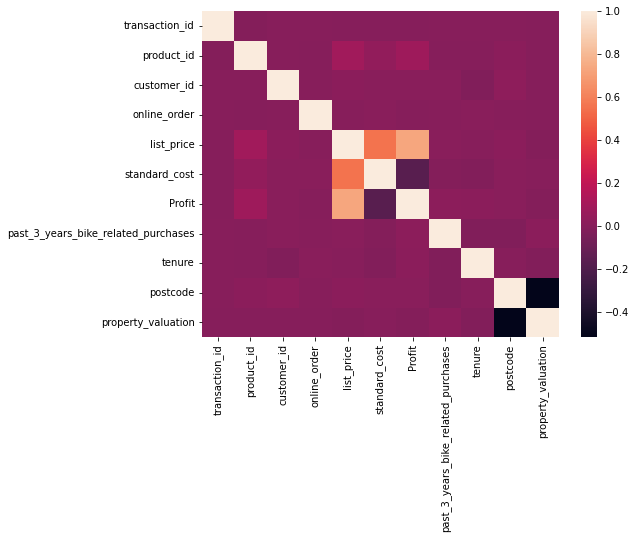

In [72]:
fig, ax = plt.subplots(figsize=(8, 6))

sns.heatmap(merged.corr())

In [73]:
merged.corr()['Profit'].sort_values(ascending=False)

Profit                                 1.000000
list_price                             0.727292
product_id                             0.075677
past_3_years_bike_related_purchases    0.017581
tenure                                 0.015590
customer_id                            0.007910
postcode                               0.007606
transaction_id                        -0.005690
online_order                          -0.006794
property_valuation                    -0.011899
standard_cost                         -0.171378
Name: Profit, dtype: float64

In [74]:
merged.corr()['past_3_years_bike_related_purchases'].sort_values(ascending=False)

past_3_years_bike_related_purchases    1.000000
Profit                                 0.017581
property_valuation                     0.010250
list_price                             0.009028
customer_id                            0.004459
online_order                           0.001238
transaction_id                        -0.000360
product_id                            -0.005411
standard_cost                         -0.008331
tenure                                -0.021978
postcode                              -0.023043
Name: past_3_years_bike_related_purchases, dtype: float64

In [75]:
merged[['past_3_years_bike_related_purchases', 'Profit']].sort_values('Profit', ascending=False)

,past_3_years_bike_related_purchases,Profit
376,NaN,1703
13133,NaN,1703
6589,34.0,1703
15524,9.0,1703
8635,81.0,1703
...,...,...
14536,10.0,5
3542,53.0,5
2067,86.0,5
16090,52.0,5


<AxesSubplot:xlabel='gender', ylabel='count'>

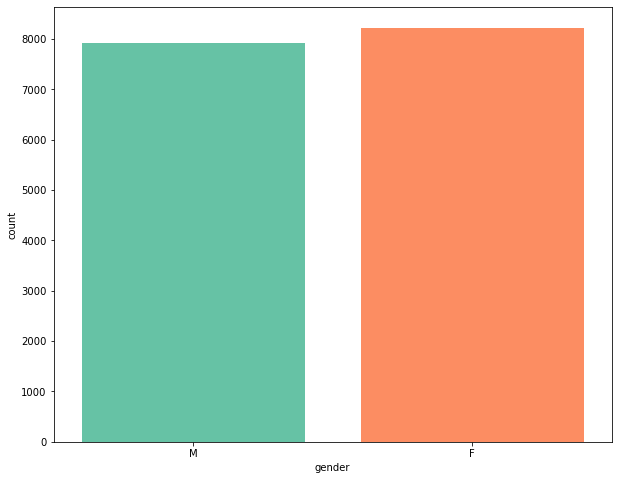

In [76]:
# Transactions by Gender

fig, ax = plt.subplots(figsize=(10, 8))
sns.countplot(x="gender", data=merged, palette='Set2', saturation=1, )

In [77]:
# We have to add a new column for the Customers' age

merged['Age'] = (pd.to_datetime('today') - merged['DOB']).astype('<m8[Y]')

In [78]:
merged['Age'].value_counts()

45.0    969
44.0    749
46.0    660
49.0    586
48.0    580
47.0    505
43.0    497
42.0    488
37.0    393
36.0    381
28.0    372
33.0    369
63.0    363
58.0    353
27.0    351
24.0    347
35.0    334
53.0    330
26.0    326
34.0    318
30.0    310
56.0    307
55.0    301
51.0    300
25.0    297
57.0    288
54.0    281
61.0    272
64.0    268
60.0    268
50.0    265
59.0    265
41.0    260
66.0    256
38.0    247
65.0    242
67.0    238
23.0    233
62.0    225
29.0    223
68.0    216
40.0    205
31.0    189
52.0    187
69.0    167
32.0    158
22.0    155
21.0    141
39.0     91
79.0     12
91.0     10
87.0      5
82.0      3
Name: Age, dtype: int64

In [79]:
merged["Age"].isna().sum()

3647

In [80]:
# Deleting emty values

merged = merged.dropna(subset=['Age'])

In [81]:
merged['Age'] = merged['Age'].astype(int)

In [82]:
merged['Age'].sort_values(ascending=False)

9852     91
15230    91
17738    91
10642    91
10232    91
         ..
16424    21
13781    21
16463    21
2536     21
8784     21
Name: Age, Length: 16156, dtype: int32

In [83]:
print(f"The customers' age is between {merged['Age'].min()} & {merged['Age'].max()} years")

The customers' age is between 21 & 91 years


C:\Users\Lazaros\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


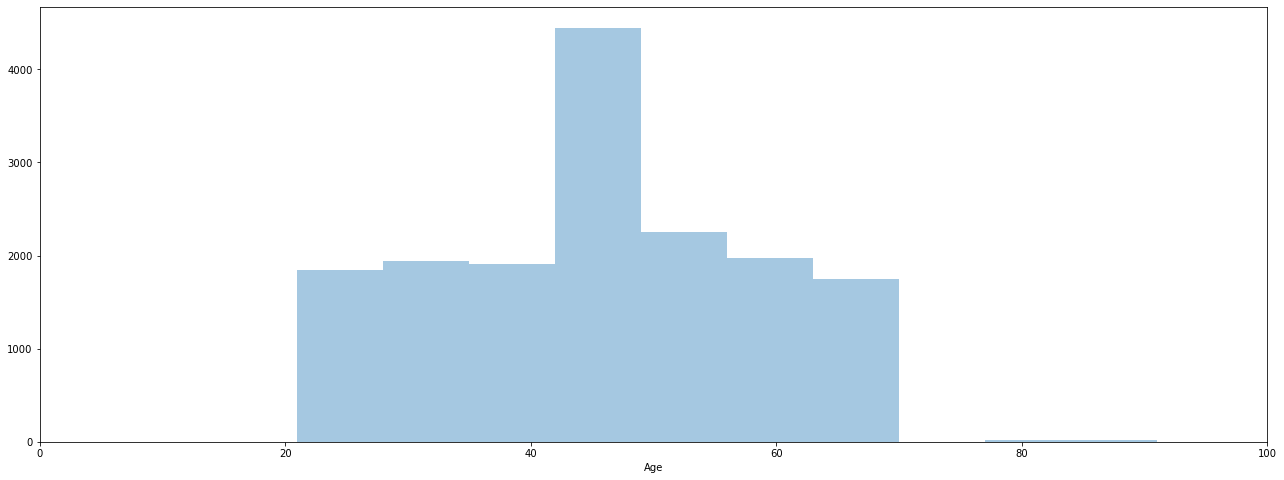

In [84]:
# Transactions by age

fig, ax = plt.subplots(figsize=(22, 8))
sns.distplot(merged['Age'], bins=10, kde=False)
plt.xlim(0, 100)
plt.show()

Now we are going to set age groups. For exapmle if someone is 24 years old, they will be in the age group "30"

In [85]:
import math

In [86]:
def round_up_to_10(x):
    return int(math.ceil(x / 10.0)) * 10

In [87]:
merged['age_group'] = merged['Age'].apply(round_up_to_10)

In [88]:
merged['age_group'].value_counts()

50     5559
60     2880
30     2755
40     2685
70     2247
80       12
100      10
90        8
Name: age_group, dtype: int64

C:\Users\Lazaros\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='age_group', ylabel='count'>

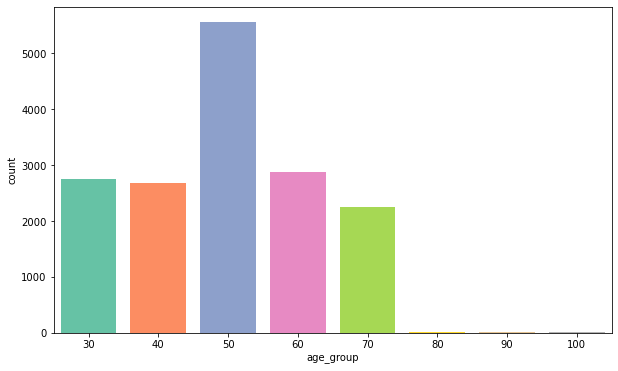

In [89]:
# Transactions by age group

fig, ax = plt.subplots(figsize=(10, 6))
sns.countplot('age_group', data=merged,palette='Set2', saturation=1)

C:\Users\Lazaros\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='job_industry_category', ylabel='count'>

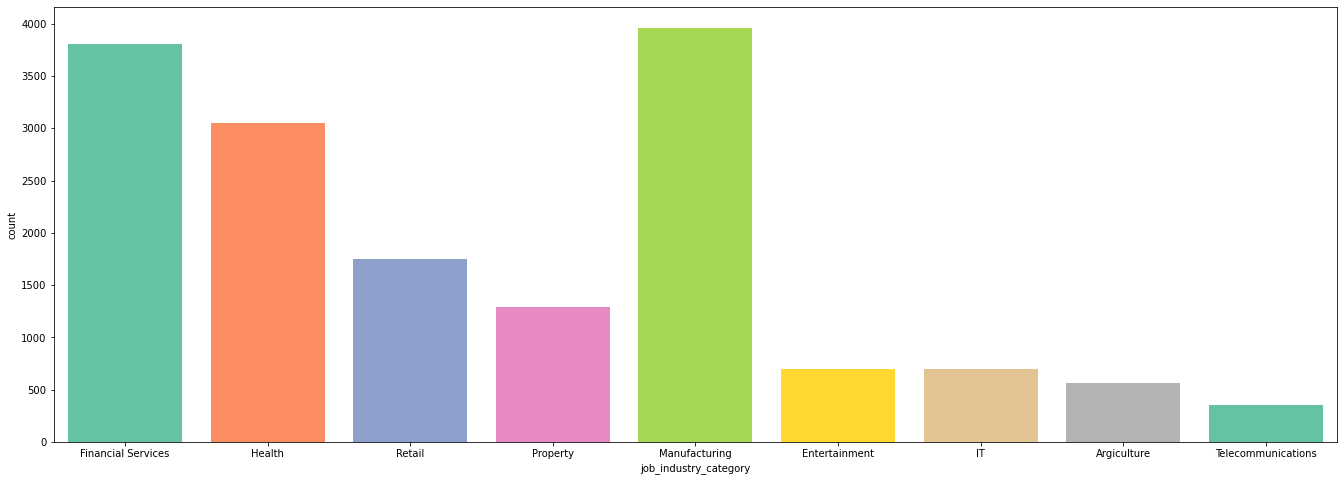

In [90]:
# Transactions by job_categpry_industry

fig, ax = plt.subplots(figsize=(23, 8))
sns.countplot('job_industry_category', data=merged, palette='Set2', saturation=2)

C:\Users\Lazaros\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='job_industry_category', ylabel='count'>

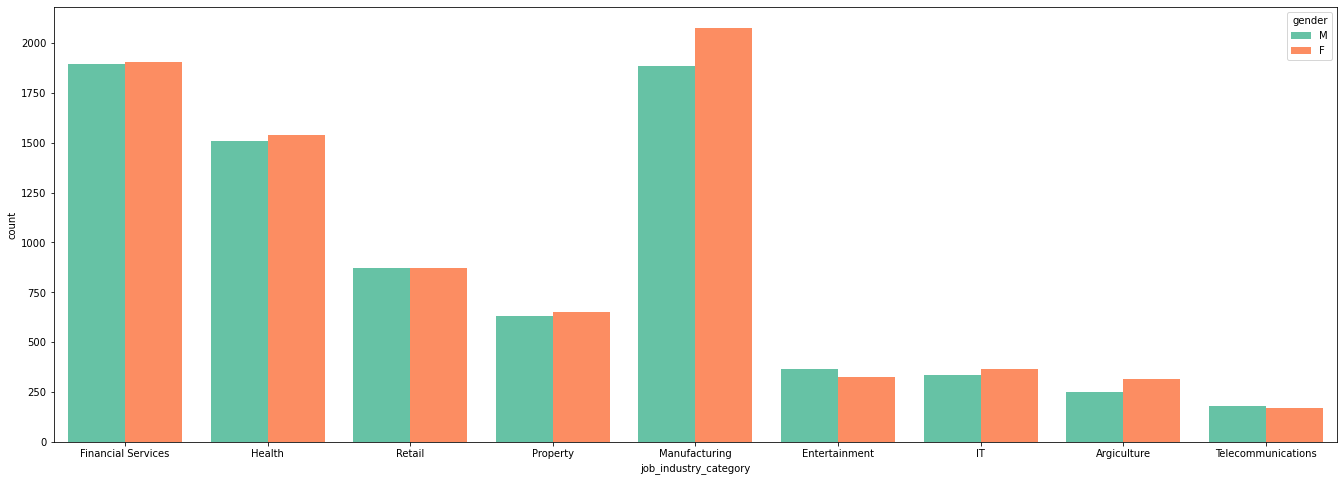

In [91]:
# Transactions by job_categpry_industry

fig, ax = plt.subplots(figsize=(23, 8))
sns.countplot('job_industry_category', data=merged, palette='Set2', saturation=2, hue='gender')

C:\Users\Lazaros\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='state', ylabel='count'>

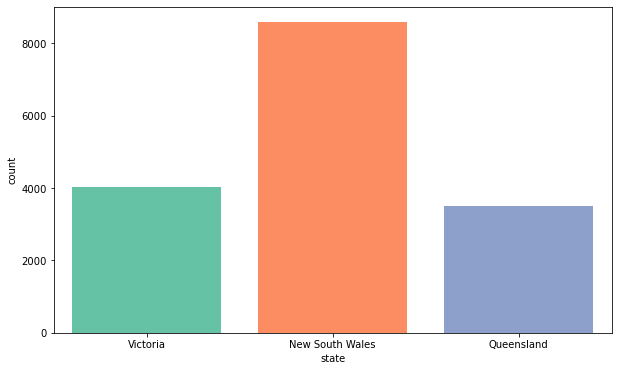

In [92]:
# Transactions by state

fig, ax = plt.subplots(figsize=(10, 6))
sns.countplot('state', data=merged,palette='Set2', saturation=1)

C:\Users\Lazaros\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='property_valuation', ylabel='count'>

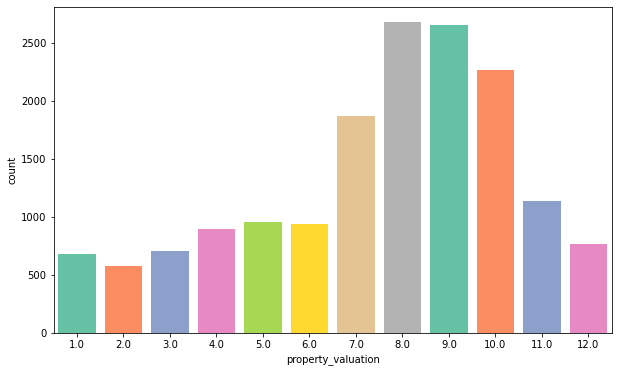

In [93]:
# Transaction by property valuation

fig, ax = plt.subplots(figsize=(10, 6))
sns.countplot('property_valuation', data=merged,palette='Set2', saturation=1)

C:\Users\Lazaros\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='owns_car', ylabel='count'>

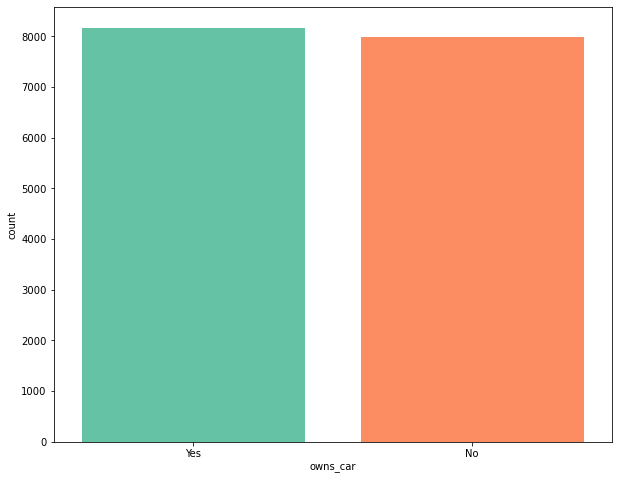

In [94]:
# Transactions by car owners

fig, ax = plt.subplots(figsize=(10, 8))
sns.countplot('owns_car', data=merged,palette='Set2', saturation=1)

C:\Users\Lazaros\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='wealth_segment', ylabel='count'>

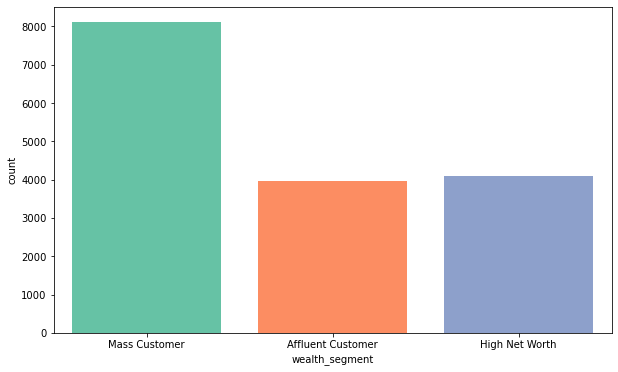

In [95]:
# Transaction by wealth segment

fig, ax = plt.subplots(figsize=(10, 6))
sns.countplot('wealth_segment', data=merged,palette='Set2', saturation=1)

C:\Users\Lazaros\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='wealth_segment', ylabel='count'>

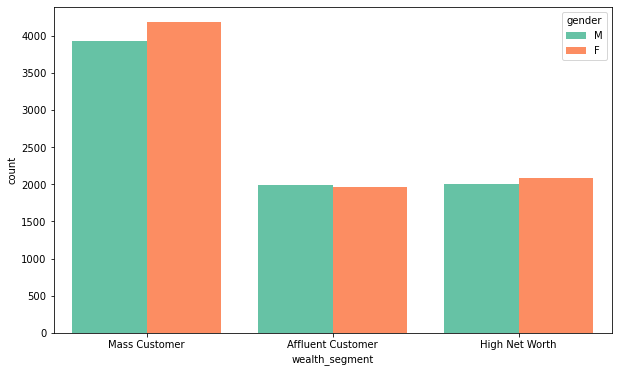

In [96]:
# Transaction by wealth segment & gender

fig, ax = plt.subplots(figsize=(10, 6))
sns.countplot('wealth_segment', data=merged,palette='Set2', saturation=1, hue='gender')

C:\Users\Lazaros\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='wealth_segment', ylabel='count'>

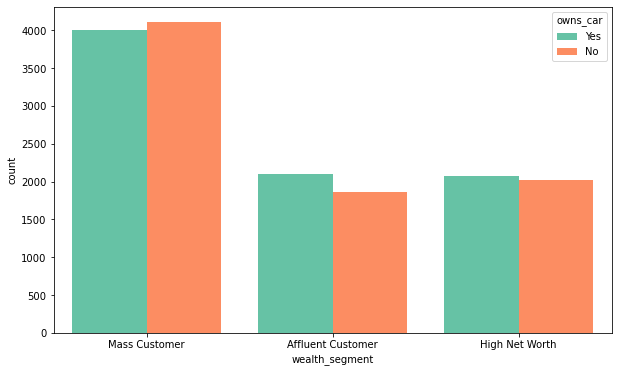

In [97]:
# Transaction by wealth segment & car owning

fig, ax = plt.subplots(figsize=(10, 6))
sns.countplot('wealth_segment', data=merged,palette='Set2', saturation=1, hue='owns_car')

# Task 3: Data Insights & Presentation

I will prepare the data that I will use for the final data analysis

In [98]:
# Replacing "1" with YES & "0" with NO

merged['online_order'] = merged['online_order'].replace({1: 'YES', 0: 'NO'})

In [99]:
merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16156 entries, 0 to 19802
Data columns (total 31 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   transaction_id                       16156 non-null  int64         
 1   product_id                           16156 non-null  int64         
 2   customer_id                          16156 non-null  int64         
 3   transaction_date                     16156 non-null  datetime64[ns]
 4   online_order                         15869 non-null  object        
 5   order_status                         16156 non-null  object        
 6   brand                                16156 non-null  object        
 7   product_line                         16156 non-null  object        
 8   product_class                        16156 non-null  object        
 9   product_size                         16156 non-null  object        
 10  list_price

In [100]:
print(f"Our final dataset has {len(merged)} rows")

Our final dataset has 16156 rows


**I will save this cleaned dataset so I can use it for the Tableau dashboard.**

In [101]:
merged.to_excel('Cleaned_Data_From_Task2.xlsx', index=False)